In [ ]:
# Clone repo.
!git clone --recursive https://github.com/statho/ScoreHMR.git
%cd ScoreHMR

Cloning into 'ScoreHMR'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 111 (delta 17), reused 107 (delta 13), pack-reused 0 (from 0)
Receiving objects: 100% (111/111), 18.42 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Submodule 'ViTPose' (https://github.com/ViTAE-Transformer/ViTPose.git) registered for path 'ViTPose'
Cloning into '/content/ScoreHMR/ViTPose'...
remote: Enumerating objects: 1859, done.        
remote: Total 1859 (delta 0), reused 0 (delta 0), pack-reused 1859 (from 1)        
Receiving objects: 100% (1859/1859), 10.74 MiB | 15.43 MiB/s, done.
Resolving deltas: 100% (973/973), done.
Submodule path 'ViTPose': checked out 'd5216452796c90c6bc29f5c5ec0bdba94366768a'
/content/ScoreHMR


In [ ]:
!pip install -q smplx==0.1.28 pyrender yacs einops ema_pytorch loguru
!pip install -q https://github.com/camenduru/wheels/releases/download/colab/mmcv_full-1.4.8-cp310-cp310-linux_x86_64.whl
!pip install -q https://github.com/camenduru/wheels/releases/download/colab/detectron2-0.6-cp310-cp310-linux_x86_64.whl
!pip install -q https://github.com/camenduru/wheels/releases/download/colab/pytube-15.0.0-py3-none-any.whl
!pip install -q https://github.com/camenduru/wheels/releases/download/colab/PyOpenGL-3.1.0-py3-none-any.whl
!pip install -q https://github.com/camenduru/wheels/releases/download/colab/chumpy-0.71-py3-none-any.whl
!pip install -q https://github.com/camenduru/wheels/releases/download/colab/neural_renderer_pytorch-1.1.3-cp310-cp310-linux_x86_64.whl
!pip install -q https://github.com/camenduru/wheels/releases/download/colab/hmr2-0.0.0-py3-none-any.whl
!pip install -q https://github.com/camenduru/wheels/releases/download/colab/phalp-0.1.3-py3-none-any.whl
!pip install -q phalp[all]@git+https://github.com/brjathu/PHALP.git
!pip install -q -e .
!pip install -q -v -e ViTPose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.6/936.6 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 696.2/696.2 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
%cd /content/ScoreHMR
!apt -y install -qq aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/statho/ScoreHMR/resolve/main/data.zip -d /content/ScoreHMR -o data.zip
!unzip -q data.zip
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/statho/ScoreHMR/resolve/main/SMPL_to_J19.pkl  -d /content/ScoreHMR/data -o SMPL_to_J19.pkl
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/statho/ScoreHMR/resolve/main/smpl_mean_params.npz -d /content/ScoreHMR/data -o smpl_mean_params.npz

/content/ScoreHMR
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 123594 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.3) ...
Selecting previously unselected package libaria2-0:amd64.
Preparing to unpack .../libaria2-0_1.36.0-1_amd64.deb ...
Unpacking libaria2-0:amd64 (1.36.0-1) ...
Selecting previously unselected package aria2.
Preparing to unpack .../aria2_1.36.0-1_amd64.deb ...
Unpacking aria2 (1.36.0-1) ...
Setting up libc-ares2:amd64 (1.18.1-1ubuntu0.22.04.3) ...
Setting up libaria2-0:amd64 (1.36.0-1) ...
Setting up

In [ ]:
# Get SMPL model file.
username = input("Username (SMPLify): ")
password = input("Password (SMPLify): ")

# URL encoding function
import urllib.parse
username_encoded = urllib.parse.quote(username)
password_encoded = urllib.parse.quote(password)

# Writing the bash script to a cell and running it
bash_script = f"""
#!/bin/bash

# Function to encode URL
urle () {{ [[ "{{1}}" ]] || return 1; local LANG=C i x; for (( i = 0; i < {{#1}}; i++ )); do x="{{1:i:1}}"; [[ "{{x}}" == [a-zA-Z0-9.~-] ]] && echo -n "{{x}}" || printf '%%%02X' "'{{x}}"; done; echo; }}

# Creating necessary directory
mkdir -p data/smpl

# Downloading the file with provided credentials
wget --post-data "username={username_encoded}&password={password_encoded}" 'https://download.is.tue.mpg.de/download.php?domain=smplify&resume=1&sfile=mpips_smplify_public_v2.zip' -O 'data/smplify.zip' --no-check-certificate --continue

# Unzipping the downloaded file
unzip data/smplify.zip -d data/smplify

# Moving the specific model file
mv data/smplify/smplify_public/code/models/basicModel_neutral_lbs_10_207_0_v1.0.0.pkl data/smpl/SMPL_NEUTRAL.pkl

# Cleaning up unnecessary files
rm -rf data/smplify
rm -rf data/smplify.zip
"""

# Write the script to a temporary file
with open("script.sh", "w") as file:
    file.write(bash_script)

# Run the script
!bash script.sh

In [ ]:
# Download HMR 2.0 checkpoint
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/ScoreHMR/resolve/main/4DHumans/hmr2_data.tar.gz -d /root/.cache/4DHumans -o hmr2_data.tar.gz
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/ScoreHMR/raw/main/4DHumans/logs/train/multiruns/hmr2/0/model_config.yaml -d /root/.cache/4DHumans/logs/train/multiruns/hmr2/0 -o model_config.yaml
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/ScoreHMR/raw/main/4DHumans/logs/train/multiruns/hmr2/0/dataset_config.yaml -d /root/.cache/4DHumans/logs/train/multiruns/hmr2/0 -o dataset_config.yaml
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/ScoreHMR/resolve/main/4DHumans/logs/train/multiruns/hmr2/0/checkpoints/epoch%3D35-step%3D1000000.ckpt -d /root/.cache/4DHumans/logs/train/multiruns/hmr2/0/checkpoints -o epoch=35-step=1000000.ckpt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/ScoreHMR/resolve/main/4DHumans/data/SMPL_to_J19.pkl -d /root/.cache/4DHumans/data -o SMPL_to_J19.pkl
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/ScoreHMR/resolve/main/4DHumans/data/smpl_mean_params.npz -d /root/.cache/4DHumans/data -o smpl_mean_params.npz
# Copy the SMPL model to the directory used by HMR 2.0
%mkdir /root/.cache/4DHumans/data/smpl
!cp data/smpl/SMPL_NEUTRAL.pkl /root/.cache/4DHumans/data/smpl/


Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
98627c|OK  |   422MiB/s|/root/.cache/4DHumans/hmr2_data.tar.gz

Status Legend:
(OK):download completed.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
58a2d6|OK  |   430KiB/s|/root/.cache/4DHumans/logs/train/multiruns/hmr2/0/model_config.yaml

Status Legend:
(OK):download completed.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
ad8086|OK  |   461KiB/s|/root/.cache/4DHumans/logs/train/multiruns/hmr2/0/dataset_config.yaml

Status Legend:
(OK):download completed.

Download Results:
gid   |stat|avg speed  |path/URI
======+====+===========+=======================================================
f393aa|OK  |   482MiB/s|/root/.cache/4DHumans/logs/train/multiruns/hmr2/0/checkpoints/epoch=35-step=

In [ ]:
!python demo_image.py \
    --img_folder example_data/images \
    --out_folder demo_out/images

2024-08-19 22:20:28.865500: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-19 22:20:28.883342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 22:20:28.904898: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 22:20:28.911474: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-19 22:20:28.926978: I tensorflow/core/platform/cpu_feature_guar

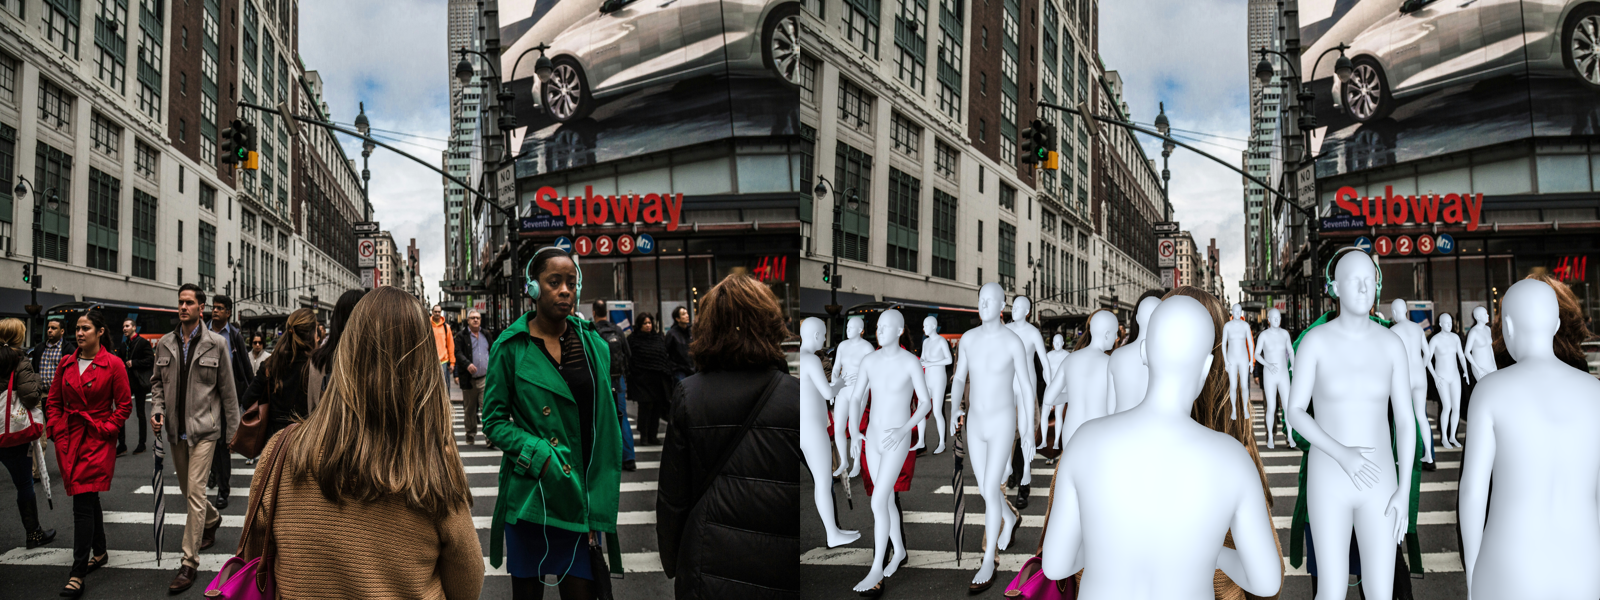

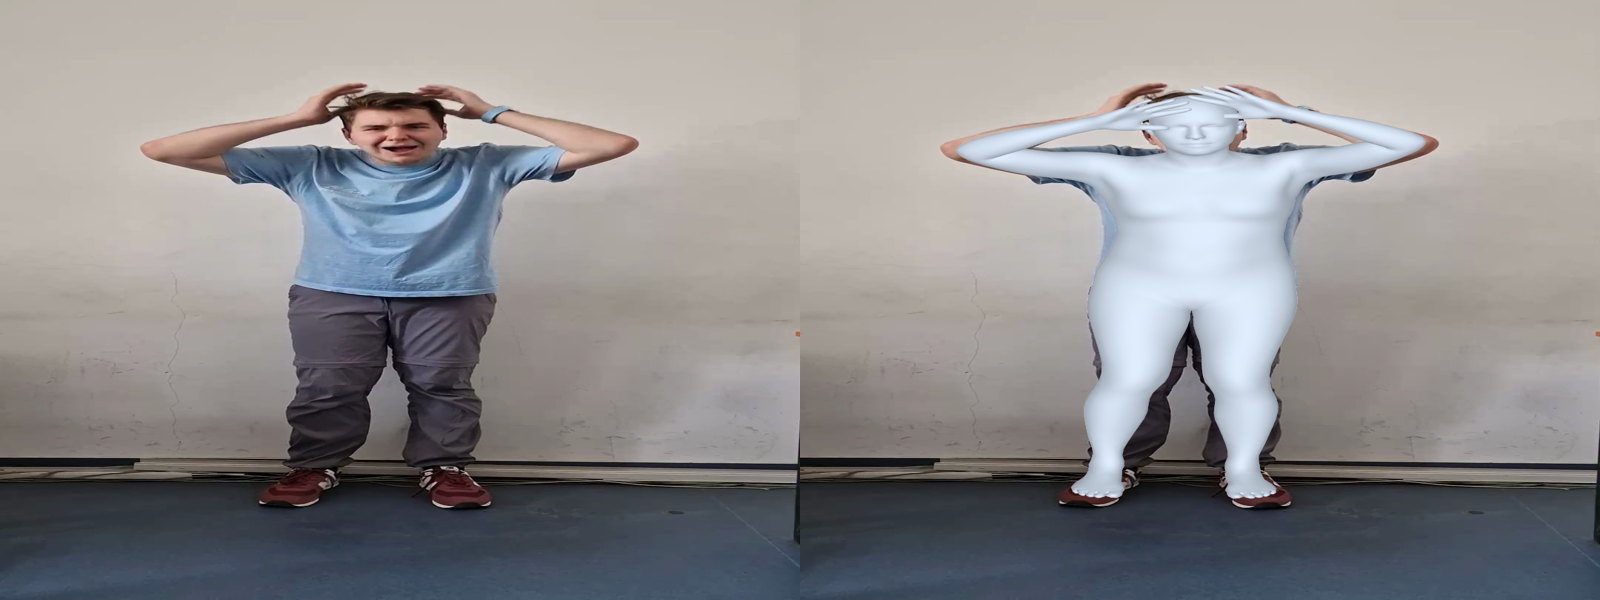

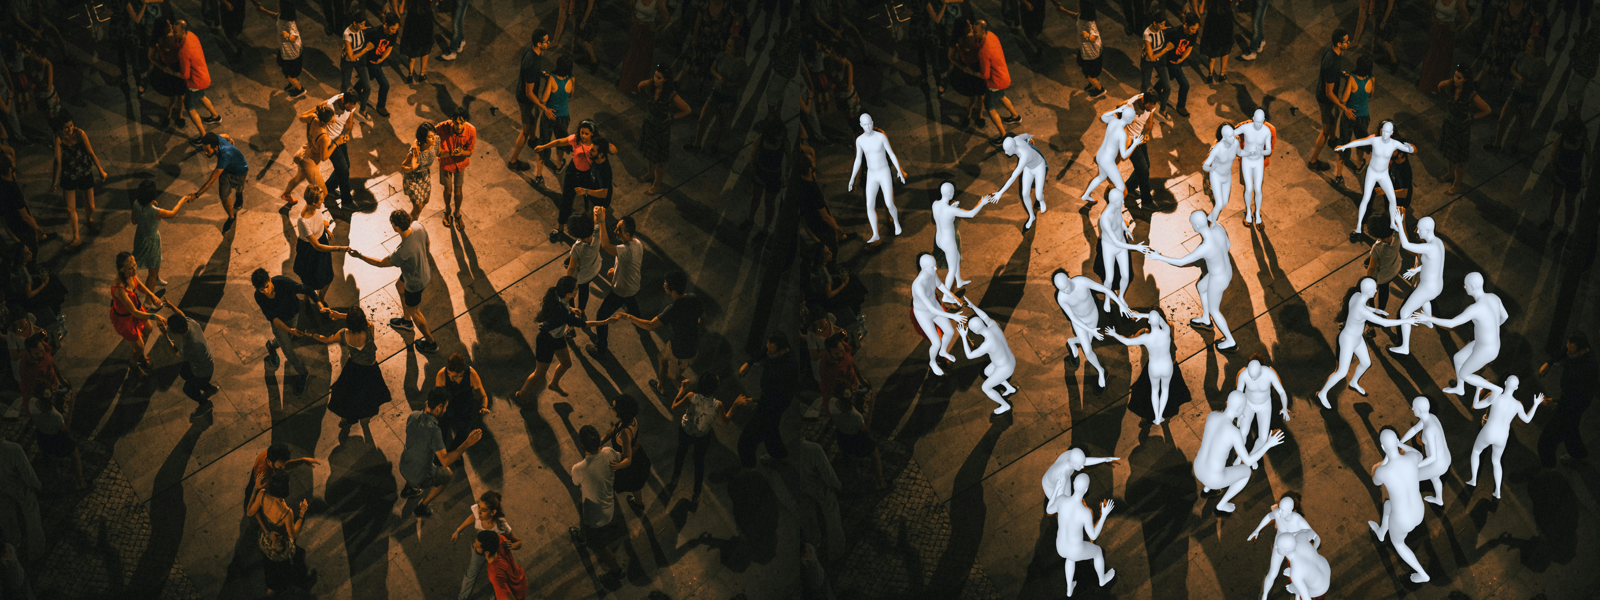

In [ ]:
import os
from PIL import Image
from IPython.display import display
img_names = [i.split('.')[0] for i in os.listdir("example_data/images") if ".jpg" in i]
new_width, new_height = 800, 600
for img_name in img_names:
  input_path = f'example_data/images/{img_name}.jpg'
  output_path = f'demo_out/images/opt_{img_name}.png'
  img_in = Image.open(input_path)
  img_out = Image.open(output_path)
  img_in_ = img_in.resize((new_width, new_height))
  img_out_ = img_out.resize((new_width, new_height))
  img = Image.new('RGB', (2*new_width, new_height))
  img.paste(img_in_, (0, 0))
  img.paste(img_out_, (new_width, 0))
  display(img)

In [2]:
# nu merge
!python demo_video.py \
    --input_video example_data/videos/breakdancing.mp4 \
    --out_folder demo_out/videos

IndentationError: unexpected indent (<ipython-input-2-798f6a254094>, line 2)

### Display the video with the reconstructed humans.

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                      <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

!ffmpeg -y -hide_banner -loglevel error -i demo_out/videos/breakdancing_0.mp4 demo_out/videos/breakdancing_ffmpeg.mp4
show_local_mp4_video('demo_out/videos/breakdancing_ffmpeg.mp4', width=960, height=540)